In [1]:
import random
import gym
import numpy as np
import sys
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# sys.path.append('sunblaze_envs')
# import sunblaze_envs

Using TensorFlow backend.


In [8]:
GAMMA = 1
LEARNING_RATE = 0.001

MEMORY_SIZE = 50000
BATCH_SIZE = 32

EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.01
EXPLORATION_DECAY = 0.995

In [9]:
class Dqn:

    def __init__(self, observation_space, action_space):
        self.exploration_rate = EXPLORATION_MAX

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0]))
            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)
        

def train(env_name, score=199, training_episodes=10000000):
#     env = sunblaze_envs.make(env_name)
    env = gym.make(env_name)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    dqn = Dqn(observation_space, action_space)
    scores = []
    all_scores = []
    for i in range(1,training_episodes):
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        while True:
            step += 1
            action = dqn.act(state)
            state_next, reward, terminal, info = env.step(action)
            reward = reward if not terminal else -reward
            state_next = np.reshape(state_next, [1, observation_space])
            dqn.remember(state, action, reward, state_next, terminal)
            state = state_next
            if terminal:
                print("Run: " + str(i) + ", exploration: " + str(dqn.exploration_rate) + ", score: " + str(step))
                scores.append(step)
                all_scores.append(step)
                break
            dqn.experience_replay()
        if (i % 100 == 0):
            avg = np.array(scores).mean()
            print("===============")
            print("Episodes: " + str(i) + ", mean 100 episodes reward: " + str(avg))
            print("===============")
            scores = []
            if avg >= score:
                break
            
    plt.plot(all_scores)
    plt.ylabel('Reward')
    plt.show()
    return dqn

def play(dqn, env_name):
    env = gym.make(env_name)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    state = env.reset()
    state = np.reshape(state, [1, observation_space])
    step = 0
    while True:
        step += 1
        env.render()
        action = dqn.act(state)
        state_next, reward, terminal, info = env.step(action)
        reward = reward if not terminal else -reward
        state_next = np.reshape(state_next, [1, observation_space])
        state = state_next
        if terminal:
            print("Score: " + str(step))
            break

Run: 1, exploration: 1.0, score: 30
Run: 2, exploration: 0.9772512378214517, score: 25
Run: 3, exploration: 0.9578907814534664, score: 21
Run: 4, exploration: 0.933294459381294, score: 27
Run: 5, exploration: 0.9038873549665959, score: 33
Run: 6, exploration: 0.8675596164681794, score: 42
Run: 7, exploration: 0.8410648110498392, score: 32
Run: 8, exploration: 0.831859218194368, score: 12
Run: 9, exploration: 0.8016280363938307, score: 38
Run: 10, exploration: 0.790477901043851, score: 15
Run: 11, exploration: 0.7810441642583167, score: 13
Run: 12, exploration: 0.7724955072656065, score: 12
Run: 13, exploration: 0.7617505868384082, score: 15
Run: 14, exploration: 0.7556778685553796, score: 9
Run: 15, exploration: 0.7384871324400207, score: 24
Run: 16, exploration: 0.7289441910343799, score: 14
Run: 17, exploration: 0.7145029791340722, score: 21
Run: 18, exploration: 0.6947646516921667, score: 29
Run: 19, exploration: 0.6844158170335664, score: 16
Run: 20, exploration: 0.674896028990821,

Run: 162, exploration: 0.01, score: 190
Run: 163, exploration: 0.01, score: 198
Run: 164, exploration: 0.01, score: 226
Run: 165, exploration: 0.01, score: 211
Run: 166, exploration: 0.01, score: 181
Run: 167, exploration: 0.01, score: 160
Run: 168, exploration: 0.01, score: 183
Run: 169, exploration: 0.01, score: 289
Run: 170, exploration: 0.01, score: 202
Run: 171, exploration: 0.01, score: 283
Run: 172, exploration: 0.01, score: 240
Run: 173, exploration: 0.01, score: 82
Run: 174, exploration: 0.01, score: 12
Run: 175, exploration: 0.01, score: 11
Run: 176, exploration: 0.01, score: 84
Run: 177, exploration: 0.01, score: 219
Run: 178, exploration: 0.01, score: 342
Run: 179, exploration: 0.01, score: 197
Run: 180, exploration: 0.01, score: 172
Run: 181, exploration: 0.01, score: 201
Run: 182, exploration: 0.01, score: 189
Run: 183, exploration: 0.01, score: 259
Run: 184, exploration: 0.01, score: 228
Run: 185, exploration: 0.01, score: 500
Run: 186, exploration: 0.01, score: 283
Run:

Run: 367, exploration: 0.01, score: 122
Run: 368, exploration: 0.01, score: 118
Run: 369, exploration: 0.01, score: 114
Run: 370, exploration: 0.01, score: 107
Run: 371, exploration: 0.01, score: 107
Run: 372, exploration: 0.01, score: 112
Run: 373, exploration: 0.01, score: 111
Run: 374, exploration: 0.01, score: 115
Run: 375, exploration: 0.01, score: 127
Run: 376, exploration: 0.01, score: 128
Run: 377, exploration: 0.01, score: 147
Run: 378, exploration: 0.01, score: 164
Run: 379, exploration: 0.01, score: 167
Run: 380, exploration: 0.01, score: 180
Run: 381, exploration: 0.01, score: 500
Run: 382, exploration: 0.01, score: 500
Run: 383, exploration: 0.01, score: 500
Run: 384, exploration: 0.01, score: 500
Run: 385, exploration: 0.01, score: 90
Run: 386, exploration: 0.01, score: 203
Run: 387, exploration: 0.01, score: 491
Run: 388, exploration: 0.01, score: 500
Run: 389, exploration: 0.01, score: 500
Run: 390, exploration: 0.01, score: 500
Run: 391, exploration: 0.01, score: 500
R

Run: 572, exploration: 0.01, score: 8
Run: 573, exploration: 0.01, score: 9
Run: 574, exploration: 0.01, score: 8
Run: 575, exploration: 0.01, score: 9
Run: 576, exploration: 0.01, score: 9
Run: 577, exploration: 0.01, score: 10
Run: 578, exploration: 0.01, score: 11
Run: 579, exploration: 0.01, score: 10
Run: 580, exploration: 0.01, score: 8
Run: 581, exploration: 0.01, score: 9
Run: 582, exploration: 0.01, score: 10
Run: 583, exploration: 0.01, score: 9
Run: 584, exploration: 0.01, score: 9
Run: 585, exploration: 0.01, score: 10
Run: 586, exploration: 0.01, score: 10
Run: 587, exploration: 0.01, score: 10
Run: 588, exploration: 0.01, score: 8
Run: 589, exploration: 0.01, score: 9
Run: 590, exploration: 0.01, score: 9
Run: 591, exploration: 0.01, score: 9
Run: 592, exploration: 0.01, score: 9
Run: 593, exploration: 0.01, score: 9
Run: 594, exploration: 0.01, score: 11
Run: 595, exploration: 0.01, score: 10
Run: 596, exploration: 0.01, score: 8
Run: 597, exploration: 0.01, score: 10
Ru

Run: 777, exploration: 0.01, score: 500
Run: 778, exploration: 0.01, score: 500
Run: 779, exploration: 0.01, score: 500
Run: 780, exploration: 0.01, score: 500
Run: 781, exploration: 0.01, score: 500
Run: 782, exploration: 0.01, score: 500
Run: 783, exploration: 0.01, score: 500
Run: 784, exploration: 0.01, score: 500
Run: 785, exploration: 0.01, score: 500
Run: 786, exploration: 0.01, score: 500
Run: 787, exploration: 0.01, score: 500
Run: 788, exploration: 0.01, score: 500
Run: 789, exploration: 0.01, score: 500
Run: 790, exploration: 0.01, score: 500
Run: 791, exploration: 0.01, score: 500
Run: 792, exploration: 0.01, score: 500
Run: 793, exploration: 0.01, score: 500
Run: 794, exploration: 0.01, score: 500
Run: 795, exploration: 0.01, score: 500
Run: 796, exploration: 0.01, score: 500
Run: 797, exploration: 0.01, score: 500
Run: 798, exploration: 0.01, score: 500
Run: 799, exploration: 0.01, score: 500
Run: 800, exploration: 0.01, score: 500
Episodes: 800, mean 100 episodes reward:

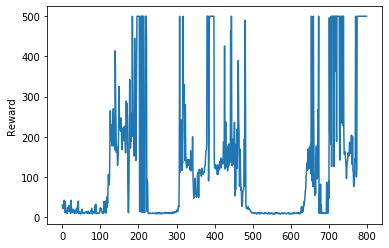

In [7]:
# dqn = train('SunblazeCartPole-v0')
env = "CartPole-v1"
dqn = train(env)

In [10]:
play(dqn, env)

Score: 500
